In [21]:
#CHEME 465 AU 2020
#HW2
#Question 4

import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

#Reaction: A -> 2B + 2C

#Data:
F_A0 = 180 #molar flow rate per unit time of the entering reactant A: mol/min
xA = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]) #conversion of A: (nA reacted)/(nA fed) no unit
neg_rA = np.array([2.0, 4.0, 10.0, 12.0, 8.5, 3.5, 3.0]) #rate of disappearance of reactant A per unit volume per unit time: mol/(L*min)
print(neg_rA)

[ 2.   4.  10.  12.   8.5  3.5  3. ]


x =  [0.  0.2 0.4 0.5 0.6 0.8 0.9]
y =  [90.    45.    18.    15.    21.176 51.429 60.   ]


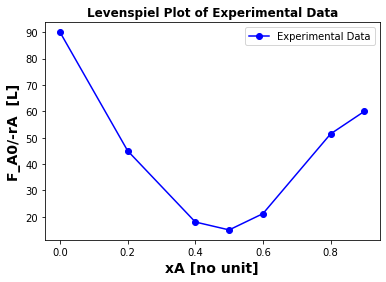

In [103]:
#Part a:

#Levenspiel Plot:
np.set_printoptions(precision=3)
x1 = xA
print("x = ", x1)
y1 = (F_A0)/(neg_rA) #(mol/min)/(mol/(min*L)) = L -> unit: L
print("y = ", y1)

plt.title("Levenspiel Plot of Experimental Data", fontweight = 'bold') 
plt.xlabel("xA [no unit]", fontweight = 'bold', fontsize = 14) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 14) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.legend()


In [73]:
#Part b:
# Desired condition: 
xA_desired_partB = 60/100 
#Goal: Compute the volume for a CSTR this would require + Compute the volume for a PFR this would require.

#According to the data:
diff = xA[4] - xA_desired_partB
print("The difference between xA[4]) and xA_desired_partB is", diff, ", so xA[4]) equals xA_desired_partB")

#According to CTSR formula, the volume to achieve the desired condition is:
V_CTSR = F_A0*xA[4]/neg_rA[4]
print("Volume for a CSTR with ", str(xA_desired_partB), "conversion is:", V_CTSR, "L")

#PFR measures the volume according to the area under the curve of the Levenspiel plot
#To use numpy.trap(), we must define:
x1_PFR = x1[0:5]
y1_PFR = y1[0:5]
# Check: print(x1_PFR)
#Integral of d/dxA [F_A0/neg_rA]:
integral = np.trapz(y1_PFR, x1_PFR) #integrate along the given axis using the composite trapezoidal rule
#According to PFR formula, the volume to achieve the desired condition is:
V_PFR = integral
print("Volume for a PFR with ", str(xA_desired_partB), "conversion is:", V_PFR, "L")

The difference between xA[4]) and xA_desired_partB is 0.0 , so xA[4]) equals xA_desired_partB
Volume for a CSTR with  0.6 conversion is: 12.705882352941176 L
Volume for a PFR with  0.6 conversion is: 23.258823529411764 L


**Part c:**

For **part a**, I used the Levenspiel Plot in Figure 2-2B at page 43 (textbook) as the referrence for the formula of y- and x-axis. The x-axis is the conversion of A, so it has no unit. The y-axis is A initial molar flow rate over the rate of A disappearance; I calculated the unit to be L (litters) for this problem. 
I also print out the values of the plot x- and y-axis on top of the plot for reference. 

For **part b**, the problem request calculation for the volume of the reactor given its conversion is 60%.

Similar to example 2-1 in the textbook page 44, I used the equation (2-13) to calculate the volume for CSTR reactor. From the 0.6 conversion (xA), we can look up the data for neg_rA on the table to be 8.5. In the code, I used the position of xA and neg_rA to link to the wanted values. I also recheck using an Excel calculation for: 180*0.6/8.5 = 12.70588. 

For PFR reactor, the volume formula requires an integral. Using recommendation from the problem, I looked up *np.trapz* and its required values; its function was defined as "integrate along the given axis using the composite trapezoidal rule." The required values are: np.trapz(y_array_like, x_arraylike) 

*   yarray_like: Input array to integrate.
*   xarray_like: The sample points corresponding to the y values.

Given our plot in part a, we integrate along the y-axis of our plot,  so we have to define new arrays of x and y until x reaches 0.6.

***Comment:*** With  0.6 conversion, the final solutions for part b are: volume of a CSTR is 12.7 L; volume for a PFR is: 23.3 L.
The volume of PFR reactor is twice the volume of a CSTR reactor. From the graphs below, the area for PFR volume is clearly bigger than the area of CSTR volume. Hence, this result make senses. 

Therefore, for this problem, if we want to design a reactor at 60 percent conversion with smaller volume, we should choose the CSTR reactor.


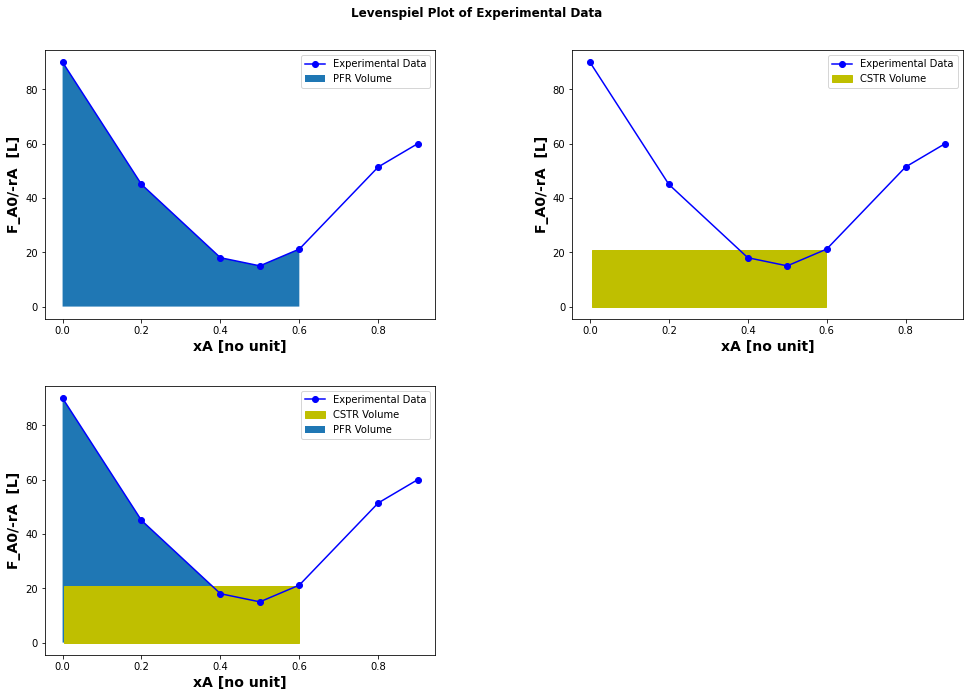

In [140]:
#Part c (extra):
plt.figure(figsize=(15, 10))
plt.suptitle("Levenspiel Plot of Experimental Data", fontweight = 'bold') 
plt.subplot(221)
plt.xlabel("xA [no unit]", fontweight = 'bold', fontsize = 14) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 14) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.fill_between(x1[0:5], y1[0:5], label = 'PFR Volume')
plt.legend()

plt.subplot(222)
plt.xlabel("xA [no unit]", fontweight = 'bold', fontsize = 14) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 14) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.axhspan(0, 21, xmin = 0.05, xmax = 0.65, color = 'y', label ='CSTR Volume')
plt.legend()

plt.subplot(223)
plt.xlabel("xA [no unit]", fontweight = 'bold', fontsize = 14) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 14) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.fill_between(x1[0:5], y1[0:5], label = 'PFR Volume')
plt.legend()
plt.axhspan(0, 21, xmin = 0.05, xmax = 0.65, color = 'y', label ='CSTR Volume')
plt.legend()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
